## 单品销量定比分析

下面实现京东电商《零基础学python（全彩版）》一书2019年销量定比分析，以2019年1月为基期，基点为1。基期：统计中计算动态指标时作为对比标准的时期。一个基点等于0.01个百分点，即0.01%

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel('JD2019.xlsx')

In [4]:
#数据处理
df1=df[df['商品名称']=='零基础学Python（全彩版）'].sort_values('日期')
df1=df1[['北京','上海','广州','成都','武汉','沈阳','西安','日期']]
df1= df1.set_index('日期')          #将日期设置为索引
df1['全国销量']=df1.sum(axis=1)     #求和运算

In [5]:
#选取2019年数据
df1=df1['2019-01-01':'2019-12-01']
print(df1)
df1['January']=df1.iloc[0,7]

              北京    上海    广州   成都   武汉   沈阳   西安    全国销量
日期                                                      
2019-01-01   493   412   273  130  143   98  121  1670.0
2019-02-01   364   356   267  112  124   62   66  1351.0
2019-03-01   601   453   382  173  164  102   94  1969.0
2019-04-01   430   334   285  151  167   90   84  1541.0
2019-05-01   334   291   275  123  161   64   70  1318.0
2019-06-01   545   597   512  213  244  115  116  2342.0
2019-07-01   644   613   517  293  481  127  116  2791.0
2019-08-01   458   457   358  187  192   90   93  1835.0
2019-09-01  1144   915   818  338  495  213  232  4155.0
2019-10-01   673   455   415  194  191  126  131  2185.0
2019-11-01  2229  1601  1367  592  650  395  407  7241.0
2019-12-01  1640  1270  1045  518  548  288  307  5616.0


In [6]:
#定比分析（以2019年1月为基期，基点为1）
df1['base']=df1['全国销量']/df1['January']

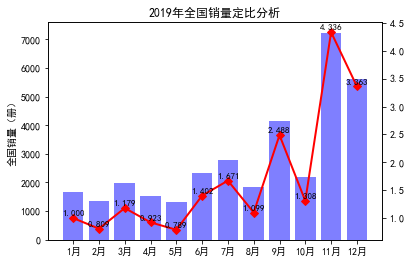

In [7]:
x=[0,1,2,3,4,5,6,7,8,9,10,11]
y1=df1['全国销量']
y2=df1['base']
fig = plt.figure()
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文乱码
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号
ax1 = fig.add_subplot(111)                  #添加子图
plt.title('2019年全国销量定比分析')         #图表标题
#图表x轴标题
plt.xticks(x,['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月'])
ax1.bar(x,y1,color = 'blue',label='left',alpha=0.5)
ax1.set_ylabel('全国销量（册）')            #y轴标签
ax2 = ax1.twinx()                           #添加一条y轴坐标轴
ax2.plot(x,y2,color='r',linestyle='-',marker='D',linewidth=2)
for a,b in zip(x,y2):
    plt.text(a, b+0.02, '%.3f' %b, ha='center', va= 'bottom',fontsize=9)
plt.show()

从图中可以看到，6月开始呈现连续小幅度增长，到11月开始大幅度增长，定比指数较10月提高了3.028个点。